<a href="https://colab.research.google.com/github/samans98/ML_Bioprospecting-/blob/main/Animal_clf_Tflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("tensorflow version:", tf.__version__)

tensorflow version: 2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [4]:
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
  plt.figure(figsize=(12, 12))
  for i in range(nb_samples):
    plt.subplot(nb_row,nb_row, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
  plt.show

TypeError: only integer scalar arrays can be converted to a scalar index

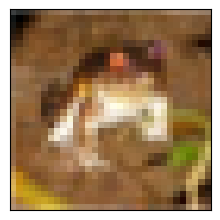

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [6]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [7]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4371 - accuracy: 0.4880 - precision: 0.7108 - recall: 0.2577 - val_loss: 1.2046 - val_accuracy: 0.5797 - val_precision: 0.7507 - val_recall: 0.3900
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0874 - accuracy: 0.6189 - precision: 0.7624 - recall: 0.4681 - val_loss: 1.0119 - val_accuracy: 0.6492 - val_precision: 0.7840 - val_recall: 0.4968
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9502 - accuracy: 0.6682 - precision: 0.7859 - recall: 0.5493 - val_loss: 0.9982 - val_accuracy: 0.6515 - val_precision: 0.7590 - val_recall: 0.5433
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8474 - accuracy: 0.7061 - precision: 0.8035 - recall: 0.6061 - val_loss: 0.9009 - val_accuracy: 0.6947 - val_precision: 0.7882 - val_recall: 0.5980
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7701 - accuracy: 

In [10]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

In [12]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
show_performance_curve(training_history, 'precision', 'precision')

IndexError: index 0 is out of bounds for axis 0 with size 0

313/313 [==============================] - 1s 2ms/step


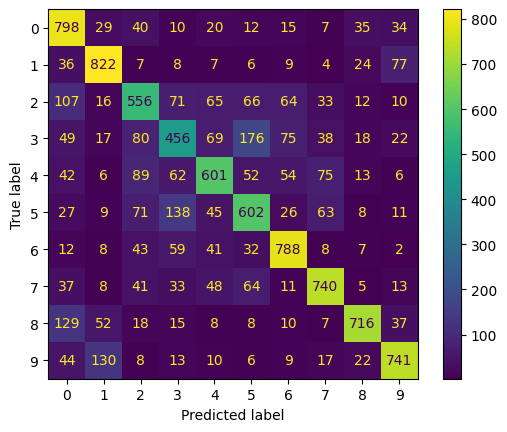

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()